In [ ]:
import pandas as pd
avoc = pd.read_csv("/content/drive/MyDrive/avocado_prices.csv")

In [ ]:
avoc


,date,region,type,averageprice,total_bags,small_bags,large_bags,xlarge_bags
0,2018-03-25,Albany,conventional,1.57,23924.33,19273.80,4270.53,380.00
1,2018-03-18,Albany,conventional,1.35,30977.21,26755.90,3721.31,500.00
2,2018-03-11,Albany,conventional,1.12,17804.72,14480.52,3033.09,291.11
3,2018-03-04,Albany,conventional,1.08,22353.29,16128.51,5941.45,283.33
4,2018-02-25,Albany,conventional,1.28,34138.80,30126.31,3702.49,310.00
...,...,...,...,...,...,...,...,...
1291,2018-02-04,WestTexNewMexico,organic,1.63,13498.67,13066.82,431.85,0.00
1292,2018-01-28,WestTexNewMexico,organic,1.71,9264.84,8940.04,324.80,0.00
1293,2018-01-21,WestTexNewMexico,organic,1.87,9394.11,9351.80,42.31,0.00
1294,2018-01-14,WestTexNewMexico,organic,1.93,10969.54,10919.54,50.00,0.00


In [ ]:
avoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1296 non-null   object 
 1   region        1296 non-null   object 
 2   type          1296 non-null   object 
 3   averageprice  1296 non-null   float64
 4   total_bags    1296 non-null   float64
 5   small_bags    1296 non-null   float64
 6   large_bags    1296 non-null   float64
 7   xlarge_bags   1296 non-null   float64
dtypes: float64(5), object(3)
memory usage: 81.1+ KB


In [ ]:
avoc.region.value_counts()

Sacramento             24
StLouis                24
Albany                 24
Roanoke                24
Detroit                24
NewYork                24
TotalUS                24
BaltimoreWashington    24
BuffaloRochester       24
HarrisburgScranton     24
WestTexNewMexico       24
Spokane                24
Portland               24
Atlanta                24
Jacksonville           24
Orlando                24
CincinnatiDayton       24
PhoenixTucson          24
SouthCarolina          24
NorthernNewEngland     24
Charlotte              24
MiamiFtLauderdale      24
Columbus               24
Tampa                  24
Denver                 24
Boston                 24
Midsouth               24
LasVegas               24
NewOrleansMobile       24
Plains                 24
Houston                24
DallasFtWorth          24
Indianapolis           24
SanFrancisco           24
LosAngeles             24
SanDiego               24
RichmondNorfolk        24
Boise                  24
Nashville   

In [ ]:
avoc['type'].value_counts()

conventional    648
organic         648
Name: type, dtype: int64

In [ ]:
avoc.describe(include=['object'])

,date,region,type
count,1296,1296,1296
unique,12,54,2
top,2018-02-18,Sacramento,conventional
freq,108,24,648


In [ ]:
avoc.describe()

,averageprice,total_bags,small_bags,large_bags,xlarge_bags
count,1296.000000,1.296000e+03,1.296000e+03,1.296000e+03,1296.000000
mean,1.347531,3.792716e+05,2.783498e+05,9.535802e+04,5563.728295
std,0.305858,1.478037e+06,1.075358e+06,4.084757e+05,25818.259882
min,0.560000,9.884500e+02,2.844300e+02,0.000000e+00,0.000000
25%,1.130000,1.186428e+04,9.071682e+03,5.208825e+02,0.000000
50%,1.345000,6.943189e+04,5.072951e+04,8.543130e+03,0.000000
75%,1.560000,1.771608e+05,1.261619e+05,3.984985e+04,842.070000
max,2.300000,1.937313e+07,1.338459e+07,5.719097e+06,309467.530000


In [ ]:
print("Вот столько раз total_bags не равно сумме коробок разных размеров: ",
      sum(avoc.total_bags-(avoc.small_bags+avoc.large_bags+avoc.xlarge_bags)>0.001)
      )

Вот столько раз total_bags не равно сумме коробок разных размеров:  0


In [ ]:
region_categ=pd.Categorical(avoc.region).codes
avoc.insert(1, 'code_reg', region_categ)

In [ ]:
type_categ=pd.Categorical(avoc['type']).codes
avoc.insert(4, 'type_categ', type_categ)

In [ ]:
avoc

,date,code_reg,region,type,type_categ,averageprice,total_bags,small_bags,large_bags,xlarge_bags
0,2018-03-25,0,Albany,conventional,0,1.57,23924.33,19273.80,4270.53,380.00
1,2018-03-18,0,Albany,conventional,0,1.35,30977.21,26755.90,3721.31,500.00
2,2018-03-11,0,Albany,conventional,0,1.12,17804.72,14480.52,3033.09,291.11
3,2018-03-04,0,Albany,conventional,0,1.08,22353.29,16128.51,5941.45,283.33
4,2018-02-25,0,Albany,conventional,0,1.28,34138.80,30126.31,3702.49,310.00
...,...,...,...,...,...,...,...,...,...,...
1291,2018-02-04,53,WestTexNewMexico,organic,1,1.63,13498.67,13066.82,431.85,0.00
1292,2018-01-28,53,WestTexNewMexico,organic,1,1.71,9264.84,8940.04,324.80,0.00
1293,2018-01-21,53,WestTexNewMexico,organic,1,1.87,9394.11,9351.80,42.31,0.00
1294,2018-01-14,53,WestTexNewMexico,organic,1,1.93,10969.54,10919.54,50.00,0.00


In [ ]:
avoc.region.value_counts()

0    1272
1      24
Name: region, dtype: int64

In [ ]:
avoc['type'].value_counts()

1    648
0    648
Name: type, dtype: int64

In [ ]:
avoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1296 non-null   object 
 1   region        1296 non-null   uint8  
 2   type          1296 non-null   uint8  
 3   averageprice  1296 non-null   float64
 4   total_bags    1296 non-null   float64
 5   small_bags    1296 non-null   float64
 6   large_bags    1296 non-null   float64
 7   xlarge_bags   1296 non-null   float64
dtypes: float64(5), object(1), uint8(2)
memory usage: 63.4+ KB


In [ ]:
avoc.averageprice.describe()

count    1296.000000
mean        1.347531
std         0.305858
min         0.560000
25%         1.130000
50%         1.345000
75%         1.560000
max         2.300000
Name: averageprice, dtype: float64

In [ ]:
from scipy.stats import shapiro

Проверяем распределение на соотвествие нормальному при помощи коэффициентов асимметрии и эксцесса, по тесту Шапиро-Уилка (ркрит=0,01) и при помощи гистограммы:

---



In [ ]:
print('Асимметрия: ', round(stats.skew(avoc.averageprice),2))
print('Эксцесс: ', round(stats.kurtosis(avoc.averageprice),2))

Асимметрия:  0.14
Эксцесс:  -0.21


In [ ]:
print("Лучше медиану и квартили") if shapiro(avoc.averageprice)[1]<0.01 else print("Лучше среднее и СКО")

Лучше среднее и СКО


Проверим по гистограмме распределения:

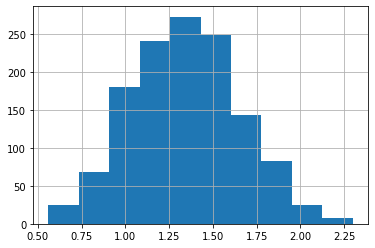

In [ ]:
avoc.averageprice.hist()

Резюме: с учетом того, что асимметрия и эксцессс по модулю меньше единицы, по критерию Шапиру-Уилка нет отклонения нулевой гипотезы на высоком уровне статистической значимости, а среднее практически не отличается от медианы, распределение признаём нормальным.
Рекомендации по представлению центральной тенденции и дисперсии: среднее и и СКО

In [ ]:
avoc

,date,region,type,averageprice,total_bags,small_bags,large_bags,xlarge_bags
0,2018-03-25,0,1,1.57,23924.33,19273.80,4270.53,380.00
1,2018-03-18,0,1,1.35,30977.21,26755.90,3721.31,500.00
2,2018-03-11,0,1,1.12,17804.72,14480.52,3033.09,291.11
3,2018-03-04,0,1,1.08,22353.29,16128.51,5941.45,283.33
4,2018-02-25,0,1,1.28,34138.80,30126.31,3702.49,310.00
...,...,...,...,...,...,...,...,...
1291,2018-02-04,1,0,1.63,13498.67,13066.82,431.85,0.00
1292,2018-01-28,1,0,1.71,9264.84,8940.04,324.80,0.00
1293,2018-01-21,1,0,1.87,9394.11,9351.80,42.31,0.00
1294,2018-01-14,1,0,1.93,10969.54,10919.54,50.00,0.00


In [ ]:
import matplotlib.pyplot as plt

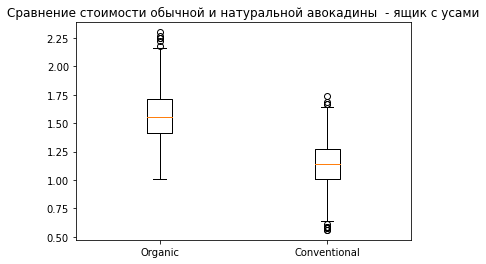

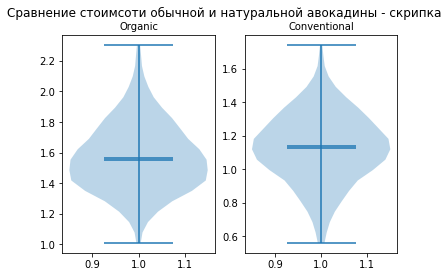

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Сравнение стоимости обычной и натуральной авокадины  - ящик с усами')
ax1.boxplot([avoc.averageprice[avoc.type_categ==1],avoc.averageprice[avoc.type_categ==0]], labels=['Organic','Conventional'])
fig2, axs2 = plt.subplots(nrows=1, ncols=2)
axs2[1].set_title('Conventional', fontsize=10)
axs2[1].violinplot(avoc.averageprice[avoc.type_categ==0], points=20, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)
axs2[0].set_title('Organic', fontsize=10)
axs2[0].violinplot(avoc.averageprice[avoc.type_categ==1], points=20, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)
fig2.suptitle("Сравнение стоимсоти обычной и натуральной авокадины - скрипка")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


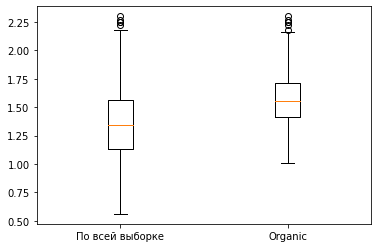

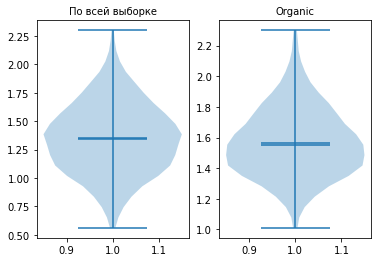

In [ ]:
fig3, ax3 = plt.subplots()
ax3.boxplot([avoc.averageprice,avoc.averageprice[avoc.type_categ==1]], labels=['По всей выборке', 'Organic'])
fig4, axs2 = plt.subplots(nrows=1, ncols=2)
axs2[1].set_title('Organic', fontsize=10)
axs2[1].violinplot(avoc.averageprice[avoc.type_categ==1], points=20, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)
axs2[0].set_title('По всей выборке', fontsize=10)
axs2[0].violinplot(avoc.averageprice, points=20, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


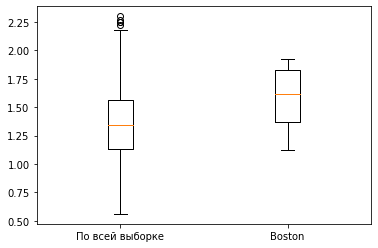

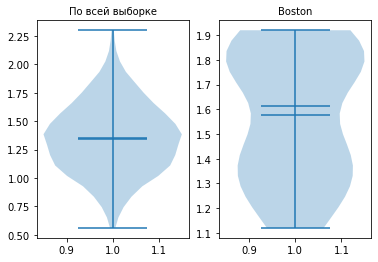

In [ ]:
fig3, ax3 = plt.subplots()
ax3.boxplot([avoc.averageprice,avoc.averageprice[avoc.region=='Boston']], labels=['По всей выборке', 'Boston'])
fig4, axs2 = plt.subplots(nrows=1, ncols=2)
axs2[1].set_title('Boston', fontsize=10)
axs2[1].violinplot(avoc.averageprice[avoc.region=='Boston'], points=20, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)
axs2[0].set_title('По всей выборке', fontsize=10)
axs2[0].violinplot(avoc.averageprice, points=20, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)
plt.show()

In [ ]:
from scipy.stats import zscore

Рассчитайте z-оценку для средней цены «натурального» авокадо в Бостоне 2018-03-25 относительно среза по Бостону. Переведите полученную z-оценку в стоимость авокадо, но уже для Чикаго.

**Вторая часть задания понята следующим образом.
Полученное единичное значение для Бостона, 2018-03-25 использовано для получения абсолютного значения с использованием среднего и СКО от Чикаго**

In [ ]:
boston_df=avoc.loc[avoc.region=='Boston'].loc[:,'date':'averageprice']
boston_df['z_csore']=(zscore(boston_df.averageprice, ddof=1))
z_boston=(
    boston_df
            .query("type_categ==1 \
                  and date=='2018-03-25'")
            .z_csore
 )
z_boston

696    0.619204
Name: z_csore, dtype: float64

In [ ]:
chicago_mean=avoc.query("region=='Chicago'").averageprice.mean()
chicago_std=avoc.query("region=='Chicago'").averageprice.std()

In [ ]:
round(z_boston.iloc[0]*chicago_std+chicago_mean,2)

1.69

Используйте известные вам статистические тесты, чтобы оценить соответствует ли закону нормального распределения средняя стоимость авокадо в Бостоне за указанный период.

Задание понято следующим образом.
**Проведена оценка соответствия распределения нормальному по всем покупкам в Бостоне, т.к. за указанный период 2018-03-25 есть только одно значение, да и среднее значение - это тоже одно значение**

In [ ]:
shapiro(boston_df.averageprice)

(0.889596700668335, 0.01303890161216259)

Интерпретация: р-уровень от 0,01 до 0,05. В зависимости от принятого критического уровня можно либо сказать, что отличается, либо нет.
Лучше смотреть по гистограмме, асимметрии и эксцессу

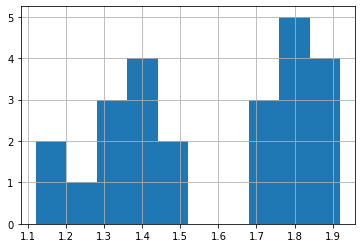

In [ ]:
boston_df.averageprice.hist()

In [ ]:
print('Асимметрия: ', round(stats.skew(boston_df.averageprice),2))
print('Эксцесс: ', round(stats.kurtosis(boston_df.averageprice),2))

Асимметрия:  -0.2
Эксцесс:  -1.5


**Резюме: распределение не соответсвует нормальному**